 # <span style="background-color: Yellow;">Description & GOAL</span> 

Data Context
This dataset contains 1,500 customer reviews for an hotel in Larnaca-Cyprus. The hotel opened exactly one year before the data was scraped, and these reviews provide valuable insight into the experiences of guests who stayed at the property during its first year of operation.

Data Content
The columns in the dataset are:

`Title:` A brief summary of the review written by the guest.

`Positive Review:` A detailed account of what the guest liked about their stay at the hotel.

`Negative Review:` A detailed account of what the guest did not like about their stay at the hotel.

`Score:` A rating out of 10 given by the guest to reflect their overall experience.

`Guest Name:` The name of the guest who wrote the review.

`Guest Country:` The country of origin of the guest who wrote the review.

`Room Type:` The type of room that the guest stayed in during their visit.

`Number of Nights:` The number of nights the guest stayed at the hotel.

`Visit Date:` The date the guest stayed at the hotel.

`Group Type:` Whether the guest was traveling alone or with a group.

`Property Response:` A response from the hotel to the guest's review.

Please note that:
- Guest Name could be 'Anonymous'

Inspiration

This data can be useful for a variety of purposes, including understanding customer satisfaction levels, identifying areas for improvement, and analyzing guest demographics and behavior.

For instance,The Score and Positive Review/Negative Review columns can be used to gauge overall satisfaction and pinpoint specific areas of improvement.
The Guest Country and Number of Nights columns can be used to analyze guest demographics and behavior, such as the nationalities and length of stays of guests at the hotel.

This data is an excellent resource for hotel managers and researchers looking to gain a deeper understanding of customer experiences at hotels.

 # <span style="background-color: green;">Imports packages</span> 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


from IPython.display import display, HTML
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from scipy.stats import skew
from wordcloud import WordCloud, STOPWORDS



#An effective way to set the display option for all the columns in the dataframe
pd.set_option('display.max_columns', None)

# Ignore in case of warnings
import warnings
warnings.filterwarnings(action="ignore")

# <span style="background-color: green;">Load Data</span>  

In [2]:
# Load data
df = pd.read_csv('/kaggle/input/hotel-reviews-bookingcom/La_Veranda_Reviews-2023-01-16.csv')

# <span style="background-color: green;">Checking Dataset</span>

In [3]:
print("**Dataset:**")
print("-------------Data-------------------\n")
display(df.head())
print("--------------Data shape ------------------\n")

print("**Dataset shape:**", df.shape)
print("--------------Data columns ------------------\n")
display(df.columns)

**Dataset:**
-------------Data-------------------



,Title,PositiveReview,NegativeReview,Score,GuestName,GuestCountry,RoomType,NumberOfNights,VisitDate,GroupType,PropertyResponse
0,Wonderful place to stay.,"New, comfortable apartments, close to the airp...",Nothing at all.,10.0,Olga,Norway,Budget Twin Room,1 night,June 2022,Solo traveler,NaN
1,It was superb,We had a really pleasant stay! The staff was v...,NaN,10.0,Iwona,Poland,Double Room,3 nights,December 2022,Family,NaN
2,Very Good,the location is great and near the airport. bu...,NaN,8.0,Ruijia,Sweden,Double Room,1 night,December 2022,Solo traveler,NaN
3,Wonderful,Great stuff\nGreat Quality/price\nClean,NaN,9.0,Theprincem,United Kingdom,Double Room with Balcony,2 nights,September 2022,Solo traveler,NaN
4,"Fantastic value for a new, modern and spotless...","Clean and modern with very comfortable beds, i...",NaN,10.0,M,Switzerland,Family Suite with Balcony,1 night,October 2022,Family,NaN


--------------Data shape ------------------

**Dataset shape:** (1523, 11)
--------------Data columns ------------------



Index(['Title', 'PositiveReview', 'NegativeReview', 'Score', 'GuestName',
       'GuestCountry', 'RoomType', 'NumberOfNights', 'VisitDate', 'GroupType',
       'PropertyResponse'],
      dtype='object')

In [4]:
print("--------------------Data description----------------------------")
display(df.describe().T.head(11))
print("--------------------Data Types----------------------------------")
display(df.dtypes.sort_values(ascending=False))
print("--------------------Data NA Check-------------------------------")
display(df.isna().sum().sort_values(ascending=False).head(20))

--------------------Data description----------------------------


,count,mean,std,min,25%,50%,75%,max
Score,1523.0,8.973802,1.300178,1.0,8.0,9.0,10.0,10.0


--------------------Data Types----------------------------------


Title                object
PositiveReview       object
NegativeReview       object
GuestName            object
GuestCountry         object
RoomType             object
NumberOfNights       object
VisitDate            object
GroupType            object
PropertyResponse     object
Score               float64
dtype: object

--------------------Data NA Check-------------------------------


PropertyResponse    1400
NegativeReview      1088
PositiveReview       748
RoomType              63
Title                  2
Score                  0
GuestName              0
GuestCountry           0
NumberOfNights         0
VisitDate              0
GroupType              0
dtype: int64

--------------------Plotting the null values columns-----------------



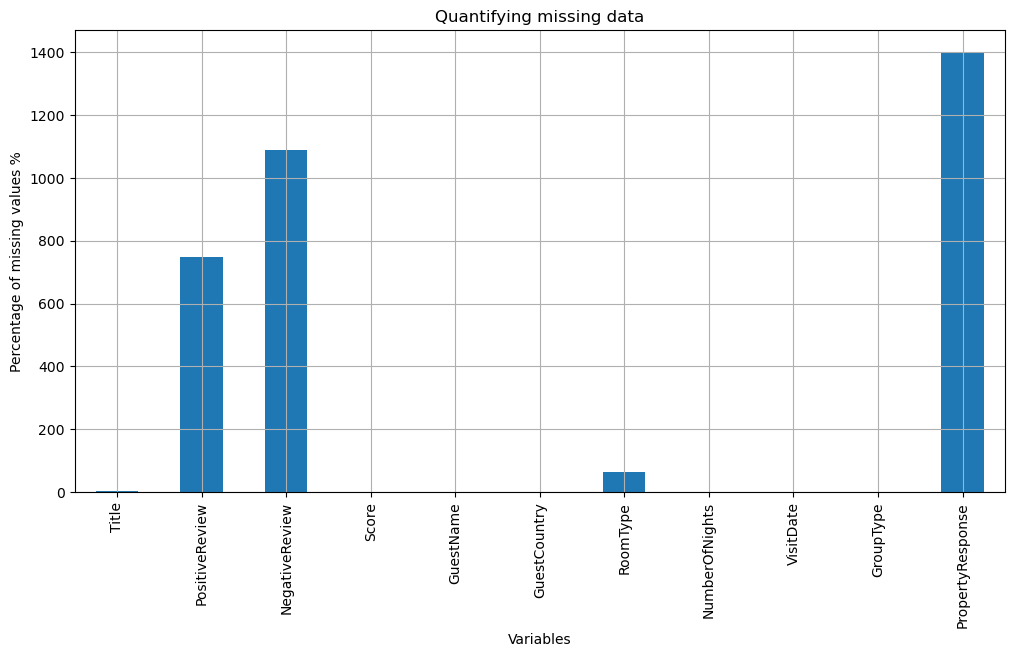

In [5]:
print("--------------------Plotting the null values columns-----------------\n")
df.isna().sum().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values %')
plt.xlabel('Variables')
plt.title('Quantifying missing data')
plt.grid()

### <span style="background-color: yellow;">Description of checking data result:</span>

* **Data contains 11 columns with 1523 samples**
* **Data contains all in Object except score column which is float type vlues**
* **Data contains null values which the most are in PropertyResponse,NegativeReview and PositiveReview**

### **In accordance with the column description, the NegativeReview and PositiveReview reflect the feedback of customers regarding their satisfaction with their accommodations and the PropertyResponse represents the hotel's response to the review of the guest.** 

### **It is now clear that the reasons for null values are as follows: the customers, whether they are satisfied or not, are not likely to leave a comment, and the hotels do not respond to the feedback of the customers.**  

# <span style="background-color: Green;">Investigating the reasons for the comments of guests</span>


## **The first step in analyzing this dataset is to plot each feature in the data set (I think we should start by looking at the scores since most of us always check the stars a hotel receives from its customers :)  


**The guest Name is not important but if `Amin` gave feedback is important🤣** 

# <span style="background-color: Green;">Distribution Checking</span>


In [6]:
def distribution(df,col):
    
    display(df[col].value_counts())
    value_counts = df[col].value_counts()
    
    colors = ['#FFA07A', '#20B2AA', '#9370DB']

    # create a bar chart of the value counts using Plotly
    fig = go.Figure([go.Bar(x=value_counts.index, y=value_counts.values,
                            marker=dict(color=value_counts.values, colorscale=colors))])

    # add labels and title
    fig.update_layout(title=f'Value Counts for {col}',
                      xaxis_title=f'{col}',
                      yaxis_title='Count')

    fig.update_traces(width=0.5)
    # display the plot
    fig.show()

## <span style="background-color: yellow;">Distribution of score</span>


In [7]:
distribution(df,'Score')

10.0    701
9.0     361
8.0     307
7.0      89
6.0      32
5.0      13
4.0       6
1.0       5
3.0       4
9.6       2
2.0       2
7.9       1
Name: Score, dtype: int64

## Due to the distribution of scores, we can see that people are not that angry with the hotel's performance since most guests rated it 8, 9 and 10. However, it is important for hotels managers to identify their weaknesses, so we need to investigate further.

## <span style="background-color: yellow;">Distribution of RoomType</span>


In [8]:
distribution(df,'RoomType')

Double Room with Balcony     702
Double Room                  351
Two-Bedroom Suite            125
Standard Triple Room         107
Budget Twin Room              80
Family Suite with Balcony     69
Suite with Balcony            26
Name: RoomType, dtype: int64

## <span style="background-color: yellow;">Distribution of Number Of Nights</span>


In [9]:
distribution(df,'NumberOfNights')

1 night      1151
2 nights      142
3 nights       92
4 nights       57
7 nights       35
5 nights       15
9 nights       10
6 nights        5
14 nights       4
11 nights       3
8 nights        3
12 nights       2
10 nights       2
16 nights       1
15 nights       1
Name: NumberOfNights, dtype: int64

## It has been observed that most guests stay in hotels only for one night, so is there a reason for this? We will see what happens

## <span style="background-color: yellow;">Distribution of VisitDate</span>


In [10]:
distribution(df,'VisitDate')

October 2022      165
July 2022         132
June 2022         129
September 2022    129
August 2022       128
October 2021      102
August 2021        96
September 2021     92
May 2022           91
November 2022      89
April 2022         83
July 2021          81
November 2021      55
June 2021          42
December 2022      31
December 2021      22
March 2022         22
February 2022      19
January 2022       11
May 2021            4
Name: VisitDate, dtype: int64

## <span style="background-color: yellow;">Distribution of GroupType</span>


In [11]:
distribution(df,'GroupType')

Couple           536
Family           415
Solo traveler    395
Group            177
Name: GroupType, dtype: int64

## <span style="background-color: yellow;">Distribution of GuestCountry</span>


In [12]:
distribution(df,'GuestCountry')

United Kingdom        239
Cyprus                183
Israel                133
France                 97
Germany                91
                     ... 
India                   1
New Zealand             1
Abkhazia, ​Georgia      1
Angola                  1
Nigeria                 1
Name: GuestCountry, Length: 68, dtype: int64

## <span style="background-color: Yellow;">Score Rating based on the countries</span>


In [13]:
df_part = df.groupby(['GuestCountry'])['Score'].mean().reset_index().sort_values(by='Score',ascending=False)

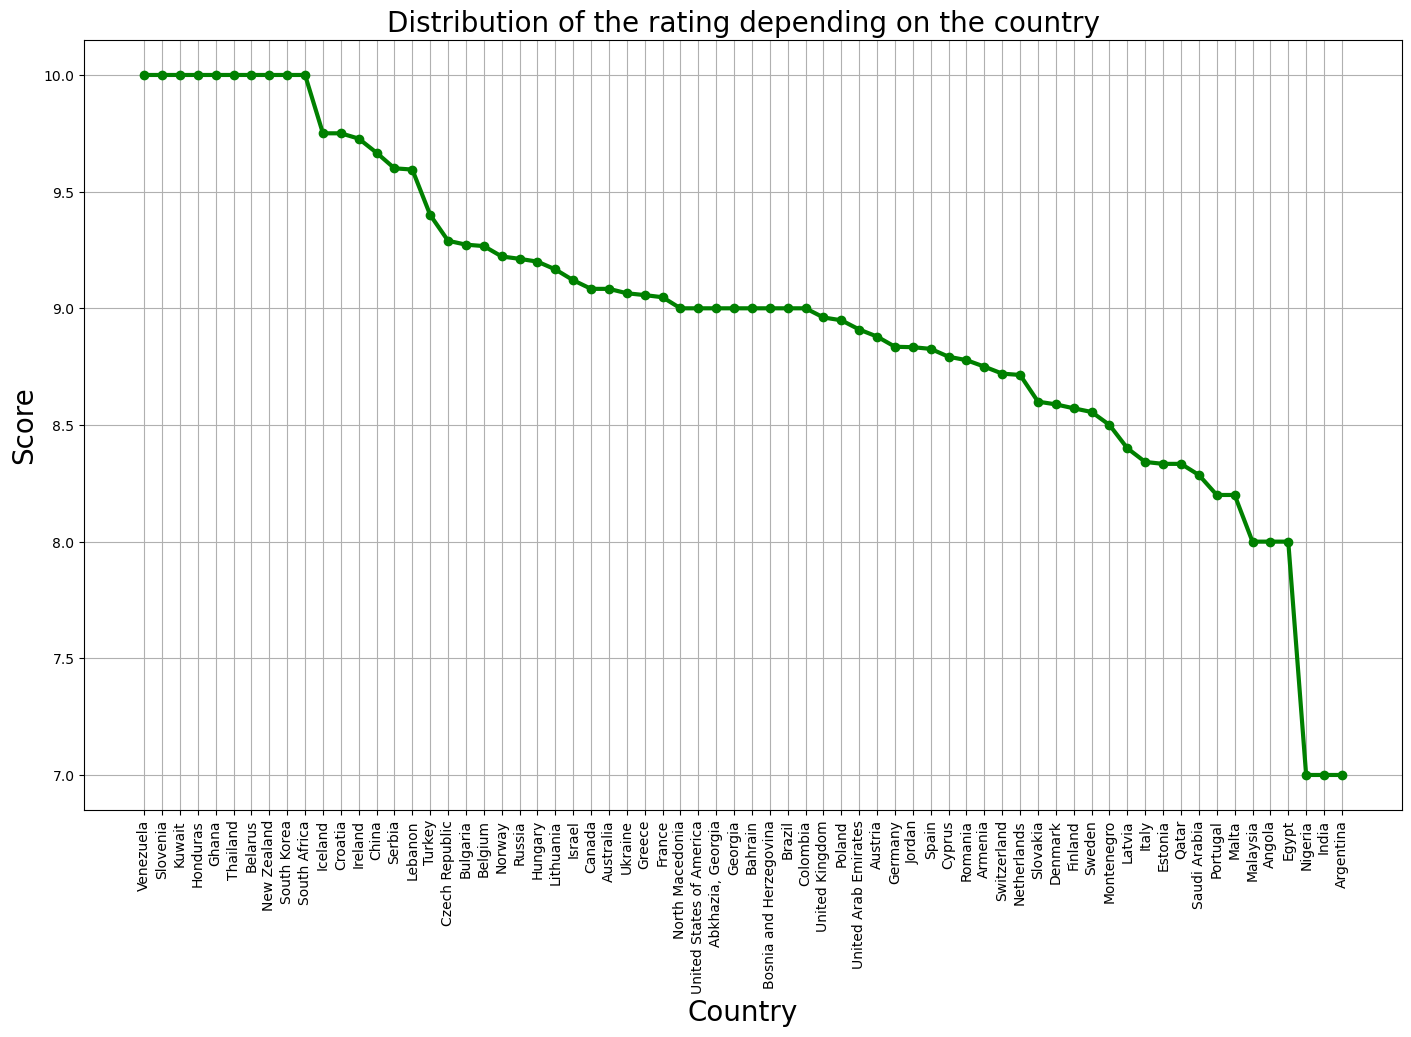

In [14]:
plt.figure(figsize=(17,10))
plt.xticks(rotation=90)
plt.plot(df_part['GuestCountry'],df_part['Score'],'go-', label='line 1', linewidth=3)
plt.title('Distribution of the rating depending on the country',fontsize = 20)
plt.xlabel("Country",fontsize = 20)
plt.ylabel("Score",fontsize = 20)
plt.grid()
plt.show()

## <span style="background-color: Yellow;">Dstribution of the rating depending on the Group Type</span>


In [15]:
df_part_title = df.groupby(['GroupType'])['Score'].mean().reset_index().sort_values(by='Score',ascending=False)

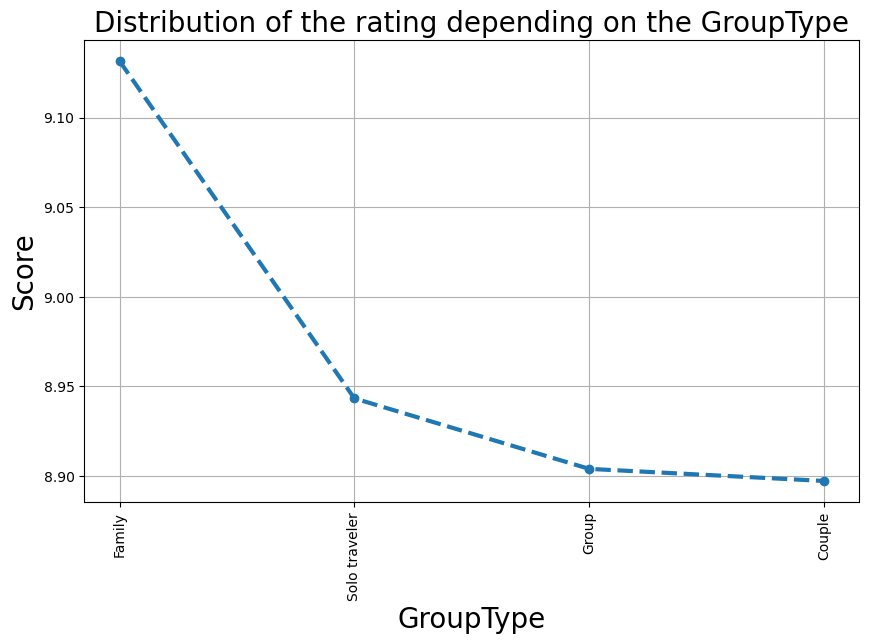

In [16]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
plt.plot(df_part_title['GroupType'],df_part_title['Score'],'o--', label='line 1', linewidth=3)
plt.title('Distribution of the rating depending on the GroupType',fontsize = 20)
plt.xlabel("GroupType",fontsize = 20)
plt.ylabel("Score",fontsize = 20)
plt.grid()
plt.show()

## <span style="background-color: Yellow;">Distribution of the rating depending on the number of nights</span>


In [17]:
df_part_nights = df.groupby(['NumberOfNights'])['Score'].mean().reset_index().sort_values(by='Score',ascending=False)

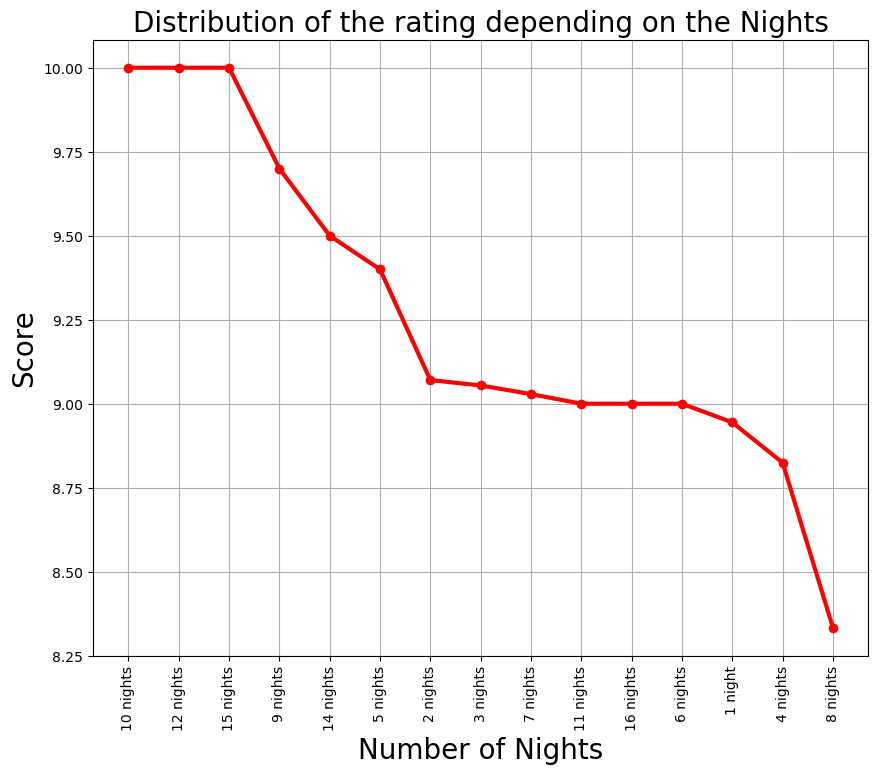

In [18]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
plt.plot(df_part_nights['NumberOfNights'],df_part_nights['Score'],'r-o', label='line 1', linewidth=3)
plt.title('Distribution of the rating depending on the Nights',fontsize = 20)
plt.xlabel("Number of Nights",fontsize = 20)
plt.ylabel("Score",fontsize = 20)
plt.grid()
plt.show()

## As can be seen here, when we group the nights by score, not only one night, but also 10 nights and 12 nights were given around 10 stars. 

# <span style="background-color: Yellow;">Checking the Comments in both Positive and Negative</span>


## In order to determine why guests gave these rates, I thought I would check the specific words for both negative and positive comments.

### I checked these words for Negatives column ["Noisy","pool","room","Bed"] and for the positive column ["airport","staff"] 
### If you wish to check the other words, please go ahead and add them to the list.. 

In [19]:
df.dropna(subset=["NegativeReview","PositiveReview"], inplace=True)

In [20]:
bad_word_to_search = ["Noisy","pool","room","Bed"]
dict_negatives = {}
for word in bad_word_to_search: 
    mask = df["NegativeReview"].str.contains(word)
    result_neg = df[mask]
    dict_negatives[word] = result_neg["Score"]

In [21]:
result_neg 

,Title,PositiveReview,NegativeReview,Score,GuestName,GuestCountry,RoomType,NumberOfNights,VisitDate,GroupType,PropertyResponse
225,"Nice, clean, priceworthy and with great staff!",Excellent staff in this family driven hotel. V...,Except excellent staff/owners and an ok restau...,9.0,Travelling,Sweden,Double Room with Balcony,3 nights,May 2022,Couple,thank you for your comments and for all these ...
428,Pleasant,Quiet location.,Bed was very soft and uncomfortable for me.\nP...,6.0,Charis,Cyprus,Double Room with Balcony,1 night,October 2022,Solo traveler,NaN
555,A pleasant and recommended hotel near Larnaca ...,We were received with a beautiful and kind hos...,Bed 5 could be opened and was less comfortable...,9.0,Keren,Israel,Two-Bedroom Suite,1 night,August 2022,Family,NaN
666,"Good, but not exceptional!\n\n\nGood, but not ...","Location close to the airport, therefore durin...",Beds are soft and with a lot of plastic theref...,8.0,J,Netherlands,Double Room with Balcony,1 night,November 2021,Couple,NaN
771,Hotel for one night\n\n\nHotel for one night,A hotel for those who make a long transfer in ...,We lived for a week\n1. Bed linen was never ch...,6.0,Aleksandr,Russia,Double Room with Balcony,7 nights,September 2021,Group,thank you for your comments. normally we chang...
783,Very Good\n\n\nVery Good,"A friendly, nice and sympathetic man serving b...","Bed frame structure dangerous, sharp corners.",8.0,Anonymous,Finland,NaN,7 nights,October 2021,Group,NaN


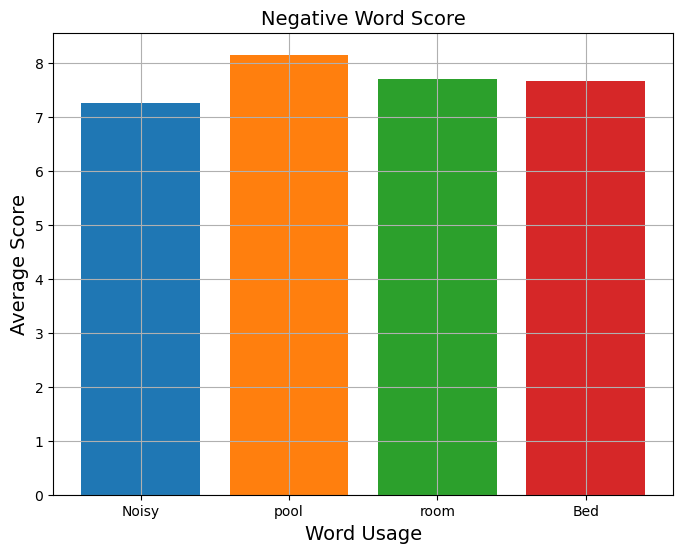

In [22]:
plt.figure(figsize=(8,6))
for name, values in dict_negatives.items():
    plt.bar(name, np.mean(values))

    
plt.xlabel('Word Usage',fontsize=14)
plt.ylabel('Average Score',fontsize=14)
plt.title('Negative Word Score',fontsize=14)


# display the plot
plt.grid()
plt.show()

In [23]:
fine_word_to_search = ["airport","staff"]
dict_positives = {}
for word in fine_word_to_search: 
    mask = df["PositiveReview"].str.contains(word)
    result_pos = df[mask]
    dict_positives[word] = result_pos["Score"]

In [24]:
result_pos

,Title,PositiveReview,NegativeReview,Score,GuestName,GuestCountry,RoomType,NumberOfNights,VisitDate,GroupType,PropertyResponse
11,"Easy to get to and park. Lovely hotel, great h...",The staff were exceptional. So helpful and fri...,Couldn’t stay longer,10.0,Heidi,United Kingdom,Two-Bedroom Suite,1 night,October 2022,Family,NaN
14,"Friendly, family run hotel with excellent kitchen",Second visit - Chose really because it was rea...,"Nothing really, though for a stay for more tha...",9.0,Thomas,United Kingdom,Double Room with Balcony,1 night,December 2022,Couple,NaN
16,Clean and cozy hotel with very friendly owner ...,The owner and staff were exceptionally friendl...,-,10.0,Miriam,Germany,Double Room with Balcony,1 night,November 2022,Couple,NaN
17,"Friendly, well run family hotel","A family run hotel, with extremely friendly re...","Nothing, considering the price",9.0,Thomas,United Kingdom,Double Room with Balcony,1 night,November 2022,Couple,NaN
25,Great stay,The hotel is 5 minutes from the beach and the ...,Leaving..in fact just re booked the hotel for ...,10.0,J,Thailand,Double Room with Balcony,1 night,November 2022,Family,"Thank you very much for your nice words, we re..."
...,...,...,...,...,...,...,...,...,...,...,...
735,Very Good\n\n\nVery Good,Staff. Everything in the hotel is new. Located...,You can see that the hotel is young. Not every...,8.0,Алексей,Ukraine,Family Suite with Balcony,1 night,June 2021,Group,thank you very much for your kind comments; ho...
772,Value for money\n\n\nValue for money,"Clean, daily change of towels, pleasant and he...",There was a constant stench coming from outsid...,7.0,Χαραλαμποσ,Greece,Double Room with Balcony,8 nights,August 2021,Couple,NaN
773,Pleasant\n\n\nPleasant,"Clean, comfortable, nice staff.",The breakfast is delicious but the same. Eat w...,6.0,Tatiana,Russia,Double Room with Balcony,3 nights,August 2021,Solo traveler,Thank you for your comments. There is a bus st...
776,Very Good\n\n\nVery Good,"comfortable and clean room, good location and ...",difficulties with the different sockets as the...,8.0,Anonymous,Greece,NaN,4 nights,July 2022,Family,NaN


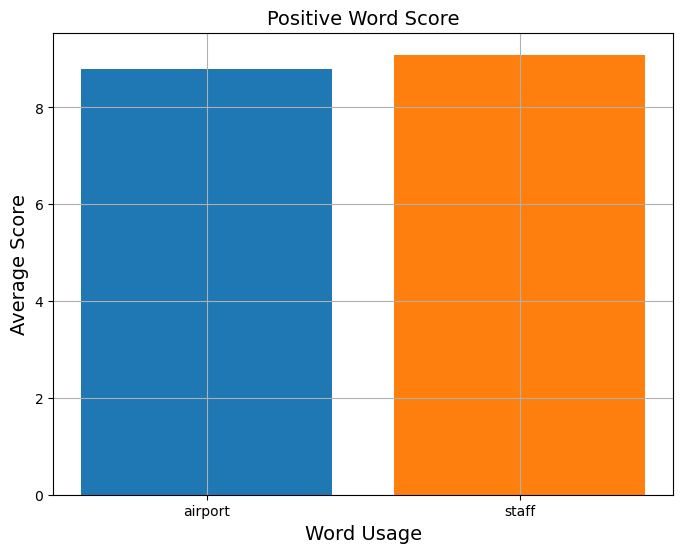

In [25]:
plt.figure(figsize=(8,6))
for name, values in dict_positives.items():
    plt.bar(name, np.mean(values))


plt.xlabel('Word Usage',fontsize=14)
plt.ylabel('Average Score',fontsize=14)
plt.title('Positive Word Score',fontsize=14)


# display the plot
plt.grid()
plt.show()

## The words can be found in both positive and negative comments, but their average score is still over seven stars, and guests are still giving good scores even with the compliments. 

## However, what attracted me most was that the hotel was located close to the airport, and since most guests are staying for only one night, they can change their flights or avoid paying more for a taxi if they only stay one night.

## <span style="background-color: Pink;">What are your thoughts on this? Please let me know if you have any suggestions or comments. </span>
